In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
df=pd.read_csv('car.csv') #Importing dataset
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
df.isnull().sum() #identifying NA values

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(398, 8)

In [5]:
column_data_types = df.dtypes
print(column_data_types)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [6]:
 # Converting Horsepower values to numeric values
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df.dropna(subset=['Horsepower'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(f"\nMissing values:\n{missing_values}")


Missing values:
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


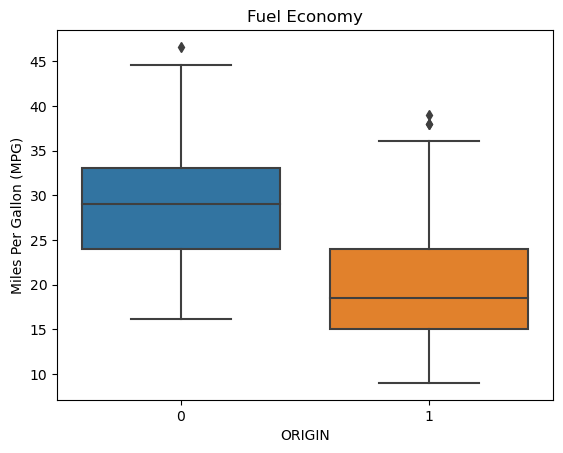

In [8]:
sns.boxplot(x='US Made', y='MPG', data=df)
plt.title('Fuel Economy')
plt.xlabel('ORIGIN')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

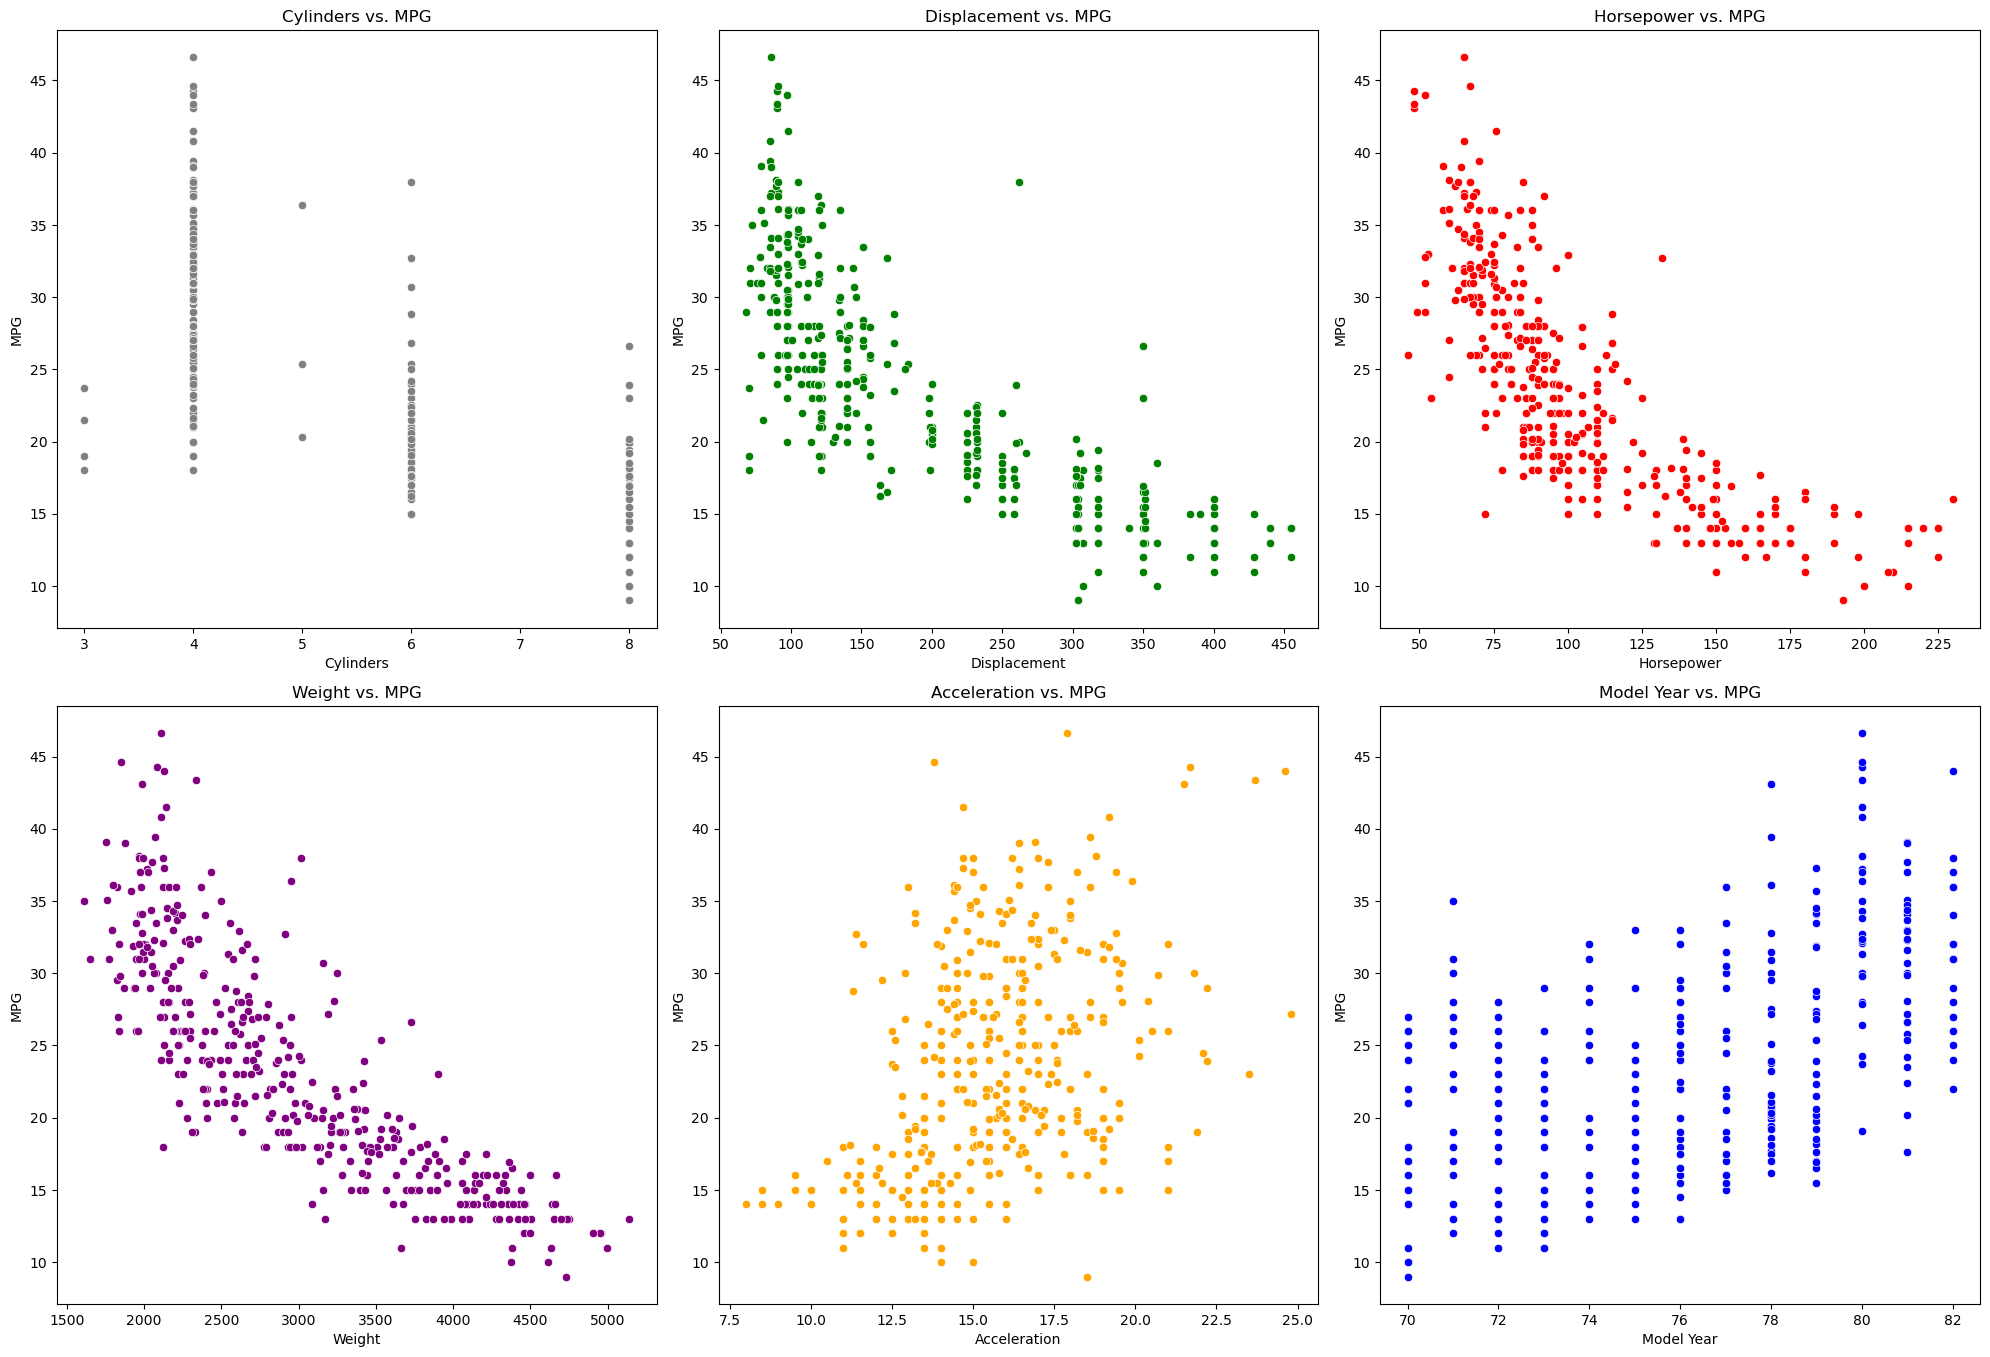

In [9]:
plt.figure(figsize=(20, 20))
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']
colors = ['grey', 'green', 'red', 'purple', 'orange', 'blue']
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df[feature], y=df['MPG'], color=colors[i])
    plt.title(f'{feature} vs. MPG')
    plt.xlabel(feature)
    plt.ylabel('MPG')
plt.tight_layout()
plt.show()

<Axes: >

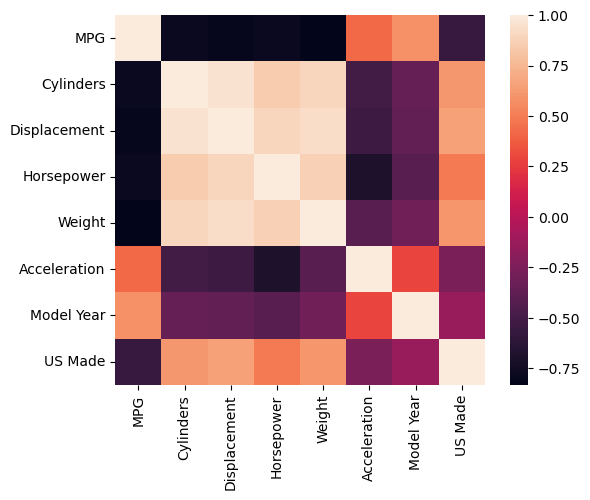

In [10]:
corrmatrix = df.corr()
sns.heatmap(corrmatrix, square= True)

Answer: [-0.15784473 39.93586102]


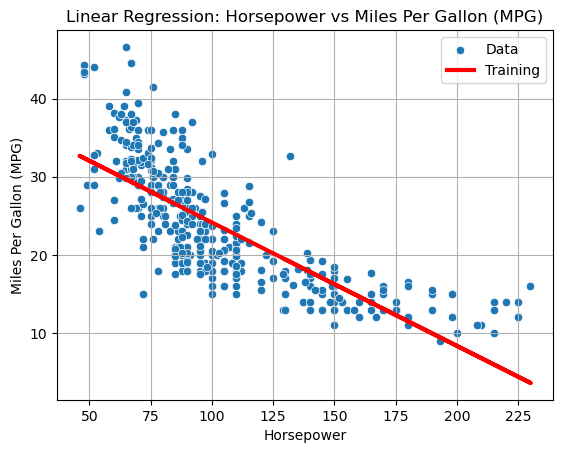

In [11]:
# Extract the significant columns:
X_linear = df[['Horsepower']].copy()
X_linear['x0'] = 1
y_linear = df['MPG'].copy()
w_linear = np.linalg.inv(X_linear.T.dot(X_linear)).dot(X_linear.T).dot(y_linear)
print('Answer:',w_linear)
sns.scatterplot(x='Horsepower', y='MPG', data=df)
plt.title('Linear Regression: Horsepower vs Miles Per Gallon (MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.plot(X_linear['Horsepower'], X_linear.dot(w_linear), color='red', linewidth=3)
plt.grid()
plt.legend(['Data','Training'])
plt.show()

In [12]:
#Identifying features independent variables and target variable
features = ['Displacement','Horsepower','Weight','Acceleration','Cylinders','Model Year','US Made']
target = 'MPG'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred) #calculating the mean sqaured error
print("Mean Squared Error:", mse)


Mean Squared Error: 10.596230571896221


In [13]:
#linear regression model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_r2 = linear_model.score(X_test, y_test)
print("Linear Regression R-squared: {:.3f}".format(linear_r2))

Linear Regression R-squared: 0.792


In [14]:
X_train = sm.add_constant(X_train) #OLS regression 
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     210.6
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          8.98e-113
Time:                        21:03:44   Log-Likelihood:                -816.80
No. Observations:                 313   AIC:                             1650.
Df Residuals:                     305   BIC:                             1680.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6855      5.319     -3.137   

In [15]:
features=['Horsepower','Weight','Model Year','US Made']
target = 'MPG'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
linear_r2 = model.score(X_test, y_test)
print("Linear Regression R-squared: {:.3f}".format(linear_r2))
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

Linear Regression R-squared: 0.781
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     363.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.63e-115
Time:                        21:03:44   Log-Likelihood:                -819.73
No. Observations:                 313   AIC:                             1649.
Df Residuals:                     308   BIC:                             1668.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.

In [16]:
features = ['Displacement','Horsepower','Weight']
target = 'MPG'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
linear_r2 = model.score(X_test, y_test)
print("Linear Regression R-squared: {:.3f}".format(linear_r2))
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

Linear Regression R-squared: 0.647
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.40e-84
Time:                        21:03:44   Log-Likelihood:                -895.59
No. Observations:                 313   AIC:                             1799.
Df Residuals:                     309   BIC:                             1814.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        

In [17]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           3.40e-84
Time:                        21:03:44   Log-Likelihood:                -895.59
No. Observations:                 313   AIC:                             1799.
Df Residuals:                     309   BIC:                             1814.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.4035      1.324     34.295   